Linear regression method





In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

content/columns
PARCELNO: unique identifier for each property. About 1% appear multiple times.
SALE_PRC: sale price ($)
LND_SQFOOT: land area (square feet)
TOT_LVG_AREA: floor area (square feet)
SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)
RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
OCEAN_DIST: distance to the ocean (feet)
WATER_DIST: distance to the nearest body of water (feet)
CNTR_DIST: distance to the Miami central business district (feet)
SUBCNTR_DI: distance to the nearest subcenter (feet)
HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
age: age of the structure
avno60plus: dummy variable for airplane noise exceeding an acceptable level
structure_quality: quality of the structure
month_sold: sale month in 2016 (1 = jan)
LATITUDE
LONGITUDE

In [7]:

miami_housing_price = pd.read_csv('miami-housing.csv')
miami_housing_price.head()
miami_housing_price.info()
miami_housing_price.describe()
miami_housing_price.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


.head() - this dataset contains its columns.
.describe()
.info() - data type,
.isnull().sum() - how many null/non-null values

Q.1 (c)all the other answers are incorrect
Q.2  NO, because diff dtype
Q.3  9 continuous variables
Q.4
Q.5 tot_lag_area
Q.6 0.38
Q.7 no
Q.10 Feature
Q.12 3 & 4



In [42]:
miami_housing_price.head()
miami_housing_price.describe()
miami_housing_price.info()
miami_housing_price.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


In [ ]:
corr = miami_housing_price.corr()
corr.style.background_gradient(cmap='coolwarm')

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.000000,0.721232,-0.165487,0.047701,-0.077481,-0.193972,-0.007634,-0.172382,0.242735,-0.423396,-0.717348,-0.195823,-0.113443,0.416967,0.081366,-0.023634,0.391989
LONGITUDE,0.721232,1.000000,-0.432816,0.195274,0.018242,-0.181007,-0.009372,-0.303155,-0.457477,-0.764256,-0.791968,-0.380220,-0.216406,0.488757,0.059416,-0.010859,0.132893
PARCELNO,-0.165487,-0.432816,1.000000,-0.204068,0.071381,0.102439,0.055152,0.223387,0.289232,0.295951,0.419933,0.243888,0.018247,-0.270718,-0.160925,0.011129,0.044652
SALE_PRC,0.047701,0.195274,-0.204068,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995
LND_SQFOOT,-0.077481,0.018242,0.071381,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686
TOT_LVG_AREA,-0.193972,-0.181007,0.102439,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422
SPEC_FEAT_VAL,-0.007634,-0.009372,0.055152,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030
RAIL_DIST,-0.172382,-0.303155,0.223387,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075
OCEAN_DIST,0.242735,-0.457477,0.289232,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497
WATER_DIST,-0.423396,-0.764256,0.295951,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343


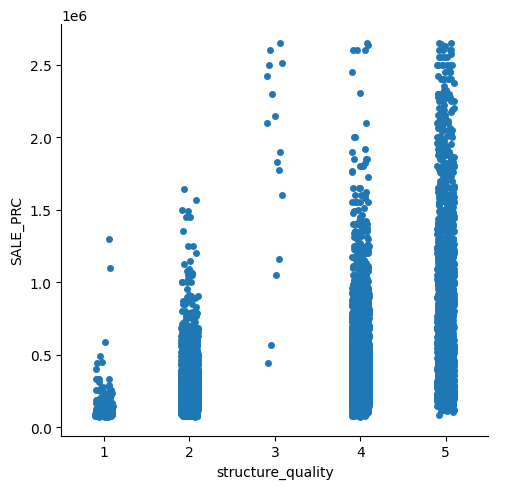

In [ ]:
sns.catplot(x='structure_quality', y='SALE_PRC', data=miami_housing_price)


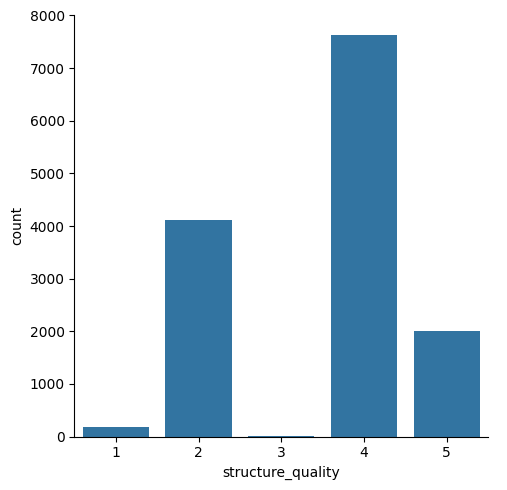

In [ ]:
sns.catplot(x='structure_quality', data=miami_housing_price, kind='count')

<Axes: xlabel='structure_quality', ylabel='SALE_PRC'>

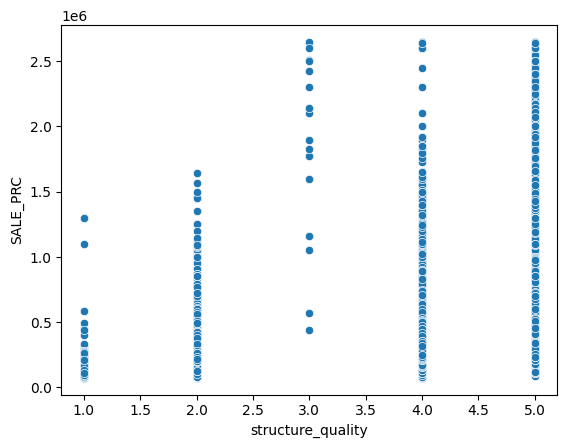

In [ ]:
sns.scatterplot(x='structure_quality', y='SALE_PRC', data=miami_housing_price)

array([[<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PARCELNO'}>,
        <Axes: title={'center': 'SALE_PRC'}>],
       [<Axes: title={'center': 'LND_SQFOOT'}>,
        <Axes: title={'center': 'TOT_LVG_AREA'}>,
        <Axes: title={'center': 'SPEC_FEAT_VAL'}>,
        <Axes: title={'center': 'RAIL_DIST'}>],
       [<Axes: title={'center': 'OCEAN_DIST'}>,
        <Axes: title={'center': 'WATER_DIST'}>,
        <Axes: title={'center': 'CNTR_DIST'}>,
        <Axes: title={'center': 'SUBCNTR_DI'}>],
       [<Axes: title={'center': 'HWY_DIST'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avno60plus'}>,
        <Axes: title={'center': 'month_sold'}>],
       [<Axes: title={'center': 'structure_quality'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

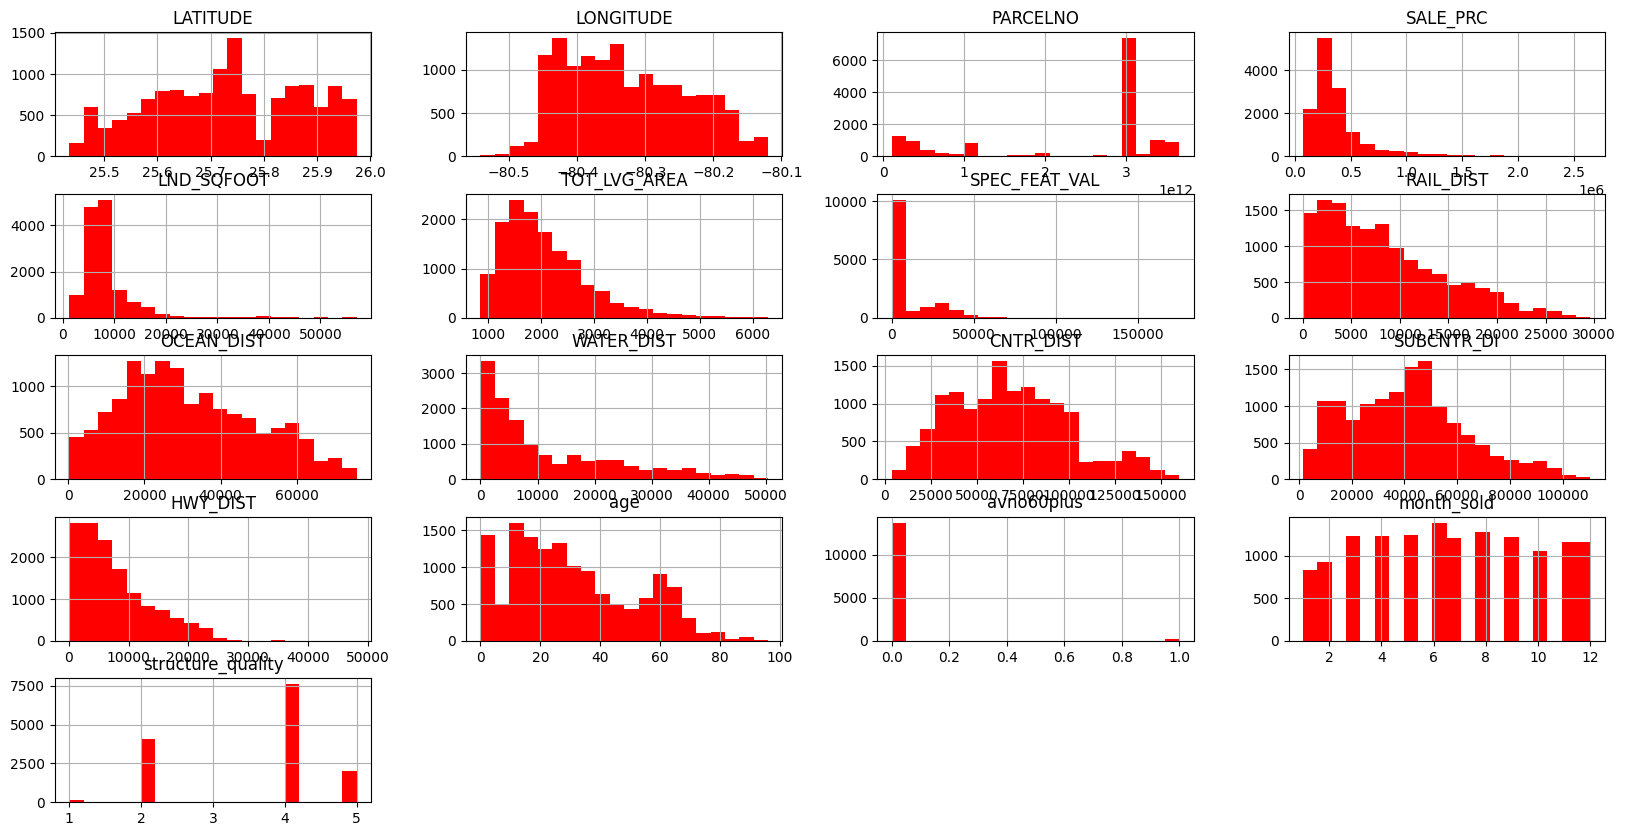

In [ ]:
miami_housing_price.hist(bins=20, figsize=(20,10), color='r')

In [ ]:
miami_housing_price.dropna(subset=['PARCELNO'], inplace=True)
miami_housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [ ]:
miami_housing_price=miami_housing_price.drop(['PARCELNO'], axis=1)
miami_housing_price.head()

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [33]:
#lets create the X and y columns for prediction
x = miami_housing_price['TOT_LVG_AREA']
y = miami_housing_price['SALE_PRC']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [73]:
# create the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [69]:
#making prediction
y_predict = lin_reg.predict(x_test.values.reshape(-1,1))

In [70]:
#calculating matrics
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("MSE: ", mse)
print("R2: ", r2)

MSE:  56566584507.49159
R2:  0.42771842643375446


In [92]:
x= miami_housing_price['TOT_LVG_AREA']
x = x.values.reshape(-1,1)
y=miami_housing_price['SALE_PRC']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
regr = LinearRegression()
regr.fit(x_train, y_train)
x= miami_housing_price['TOT_LVG_AREA']
x = x.values.reshape(-1,1)
y=miami_housing_price['SALE_PRC']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_predict = regr.predict(x_test)
print("slope of the line: ", regr.coef_)
print("intercept of the line: ", regr.intercept_)


slope of the line:  [261.41387747]
intercept of the line:  -137199.04188888293


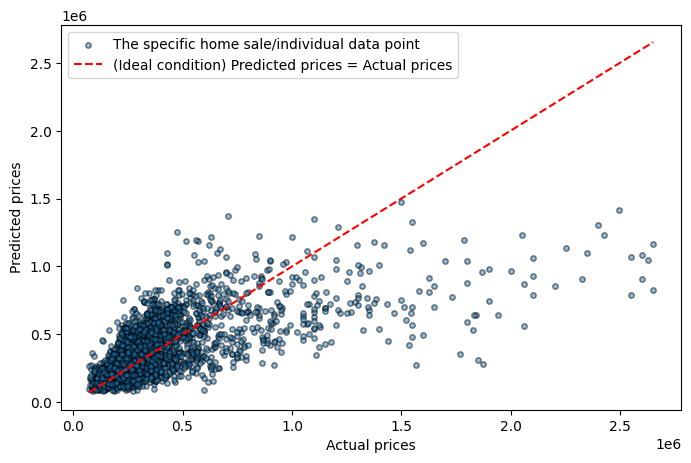

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, alpha=0.5, s=15, edgecolors='k', label="The specific home sale/individual data point")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label="(Ideal condition) Predicted prices = Actual prices")
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.legend()
plt.show()


In [ ]:
acc = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

In [82]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
data

,Actual,Predicted
6701,315000.0,1.968879e+05
9764,359000.0,6.559307e+05
13128,350000.0,3.796162e+05
8575,330000.0,5.299292e+05
9855,321000.0,4.708496e+05
...,...,...
10439,339900.0,6.480882e+05
6014,553100.0,1.087264e+06
13273,287000.0,2.747892e+05
4976,490000.0,5.937142e+05


In [83]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
y_predict = lin_reg.predict(x_test.values.reshape(-1,1))



In [85]:
x = miami_housing_price.drop(['PARCELNO','SALE_PRC'], axis=1)
y = miami_housing_price['SALE_PRC']

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
regr_1 = LinearRegression()
regr_1.fit(x_train, y_train)
y_predict = regr_1.predict(x_test)
mse_1 = mean_squared_error(y_test, y_predict)
r2_1 = r2_score(y_test, y_predict)
print("MSE: ", mse_1)
print("R2: ", r2_1)

MSE:  31143983458.392006
R2:  0.6849177298599454


In [97]:
# Assuming 'TOT_LVG_AREA' is the feature we want to plot
if 'TOT_LVG_AREA' in X_test.columns:
    X_test_tot_lvg_area = X_test['TOT_LVG_AREA']

    plt.figure(figsize=(10, 5))
    plt.scatter(X_test_tot_lvg_area, y_test, color="b", label="Actual prices")
    plt.plot(X_test_tot_lvg_area, y_predict, color="g", label="Predicted Prices")
    plt.xlabel("TOT_LVG_AREA")
    plt.ylabel("SALE_PRC")
    plt.legend()
    plt.show()
else:
    print("Column 'TOT_LVG_AREA' not found in X_test.")


NameError: name 'X_test' is not defined

In [137]:
feat_data = pd.DataFrame({"LND_SQFOOT":[1000],
                     "TOT_LVG_AREA":[200],
                     "SPEC_FEAT_VAL":[40],
                    "RAIL_DIST":[100],
                     "OCEAN_DIST":[100],
                     "WATER_DIST":[200],
                     "CNTR_DIST":[100],
                     "SUBCNTR_DI":[50],
                     "HWY_DIST":[50],
                     "age":[60],
                     "avno60plus":[0],
                     "structure_quality":[1],
                     "month_sold":[6],
                      "LATITUDE":[25.7617],
                      "LONGITUDE":[80.1918]

                })

In [147]:

feat_data_aligned = feat_data[regr_1.feature_names_in_]
new1_pred = regr_1.predict(feat_data_aligned)
print(new1_pred)


[3.06981101e+08]


In [139]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [140]:
import joblib

In [141]:
joblib.dump(regr_1, 'miami_housing_price_model.joblib')

['miami_housing_price_model.joblib']

In [142]:
model = joblib.load('miami_housing_price_model.joblib')

In [148]:
# Ensure feature_data matches the training feature names and order
feature_data_aligned = feature_data[model.feature_names_in_]
model_pred = model.predict(feature_data_aligned)
print(model_pred)

[3.06981101e+08]
